# **Data Visualization with Matplotlib**


Download database file.


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-09-18 11:24:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  18.9MB/s    in 1.8s    

2024-09-18 11:24:31 (18.9 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



#Connect to the database.


In [4]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [5]:
import pandas as pd

## Run an sql query


In [6]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## List all tables


In [7]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Run a group by query


In [8]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Describe a table


In [9]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


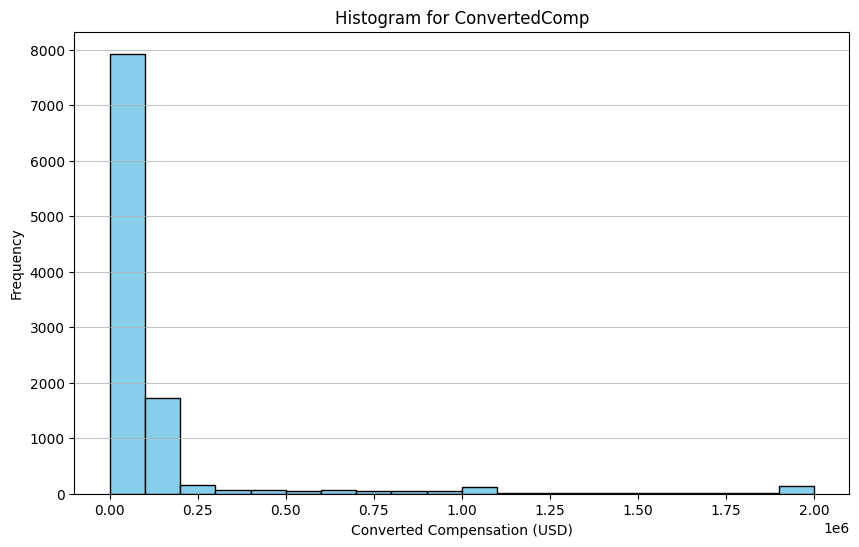

In [10]:
# your code goes here

import matplotlib.pyplot as plt

# Read data from the database into a DataFrame
query = "SELECT ConvertedComp FROM master"
df = pd.read_sql_query(query, conn)

# Plot the histogram for 'ConvertedComp'
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Box Plots


Plot a box plot of `Age.`


Number of missing values in the 'Age' column: 287
Values in the 'Age' column:
0        22.0
1        23.0
2        28.0
3        26.0
4        29.0
         ... 
11393    36.0
11394    25.0
11395    34.0
11396    25.0
11397    30.0
Name: Age, Length: 11111, dtype: float64


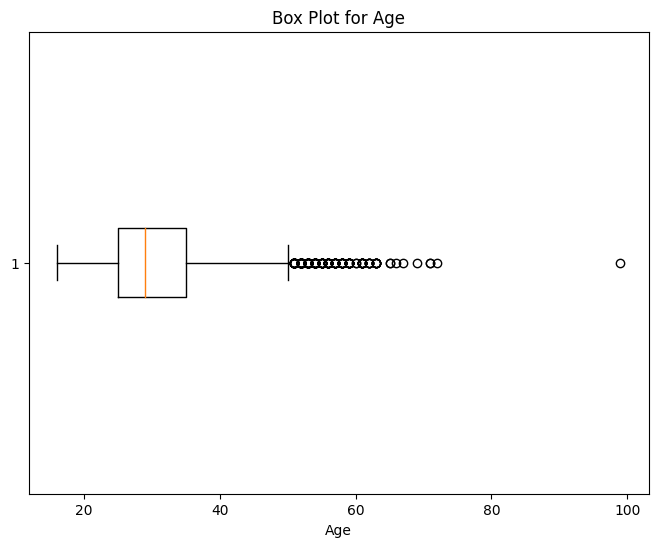

In [11]:
# your code goes here

# Read data from the database into a DataFrame
query = "SELECT Age FROM master"
df = pd.read_sql_query(query, conn)

# Check for missing values in the 'Age' column
missing_values = df['Age'].isnull().sum()
print(f"Number of missing values in the 'Age' column: {missing_values}")

# Drop rows with missing values in the 'Age' column
df = df.dropna(subset=['Age'])

# Convert the 'Age' column to float if needed
df['Age'] = df['Age'].astype(float)

# Print the values in the 'Age' column
print("Values in the 'Age' column:")
print(df['Age'])

# Plot the box plot for 'Age'
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=False)
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


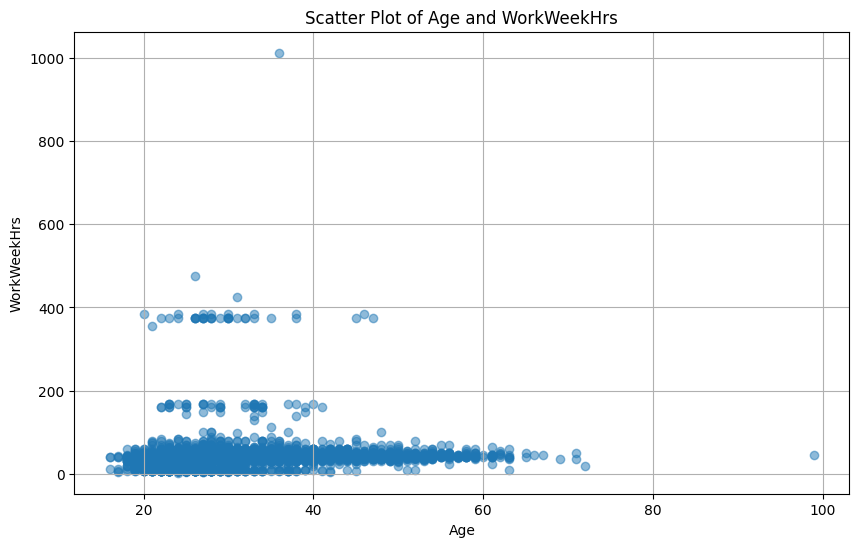

In [12]:
# your code goes here

# Read data from the database into a DataFrame
query = "SELECT Age, WorkWeekHrs FROM master"
df = pd.read_sql_query(query, conn)

# Check for missing values and drop rows with missing values
df = df.dropna(subset=['Age', 'WorkWeekHrs'])

# Plot the scatter plot for 'Age' and 'WorkWeekHrs'
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5)
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.grid(True)
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


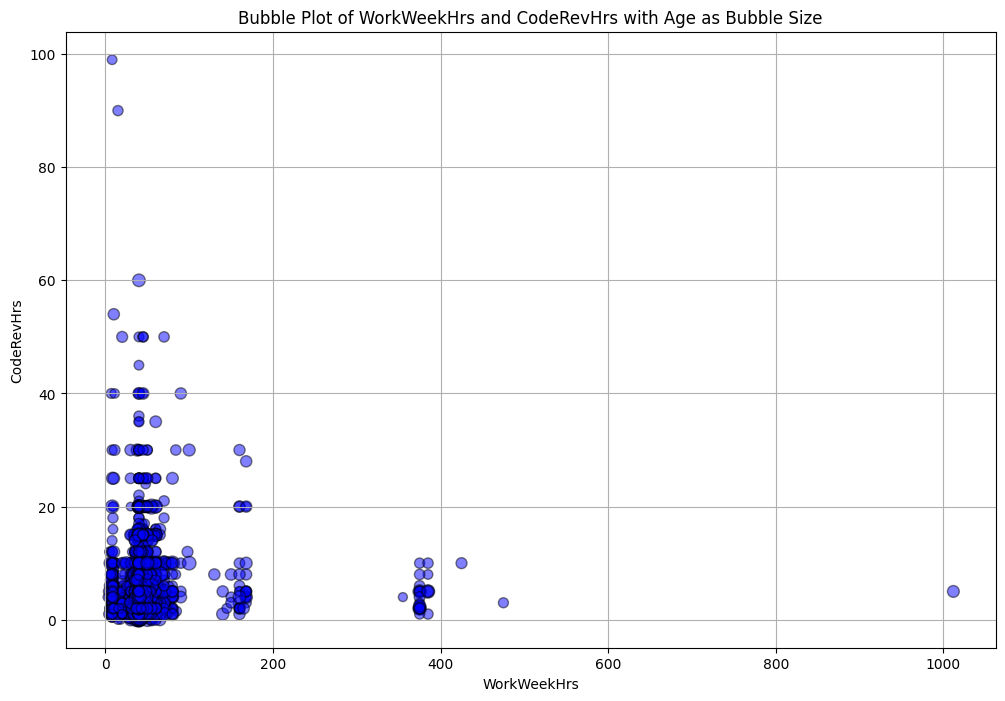

In [13]:
# your code goes here

# Read data from the database into a DataFrame
query = "SELECT Age, WorkWeekHrs, CodeRevHrs FROM master"
df = pd.read_sql_query(query, conn)

# Check for missing values and drop rows with missing values
df = df.dropna(subset=['Age', 'WorkWeekHrs', 'CodeRevHrs'])

# Define the bubble size based on the 'Age' column
bubble_size = df['Age'] * 2  # Adjust the multiplier based on preference

# Plot the bubble plot for 'WorkWeekHrs' and 'CodeRevHrs' with 'Age' as bubble size
plt.figure(figsize=(12, 8))
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=bubble_size, alpha=0.5, c='blue', edgecolors='black')
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs with Age as Bubble Size')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.grid(True)
plt.show()

## Visualizing composition of data


In [14]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


### Pie Charts


In [15]:
# Read data from the database into a DataFrame
query = "SELECT LanguageDesireNextYear, COUNT(*) AS Count FROM LanguageDesireNextYear GROUP BY LanguageDesireNextYear ORDER BY Count DESC LIMIT 5"
df = pd.read_sql_query(query, conn)

# Find the rank of Python
python_rank = df[df['LanguageDesireNextYear'] == 'Python'].index[0] + 1

# Print the list and the rank of Python
print("Most popular languages respondents wish to learn next year:")
print(df)
print("\nRank of Python:", python_rank)

Most popular languages respondents wish to learn next year:
  LanguageDesireNextYear  Count
0             JavaScript   6630
1               HTML/CSS   5328
2                 Python   5239
3                    SQL   5012
4             TypeScript   4088

Rank of Python: 3


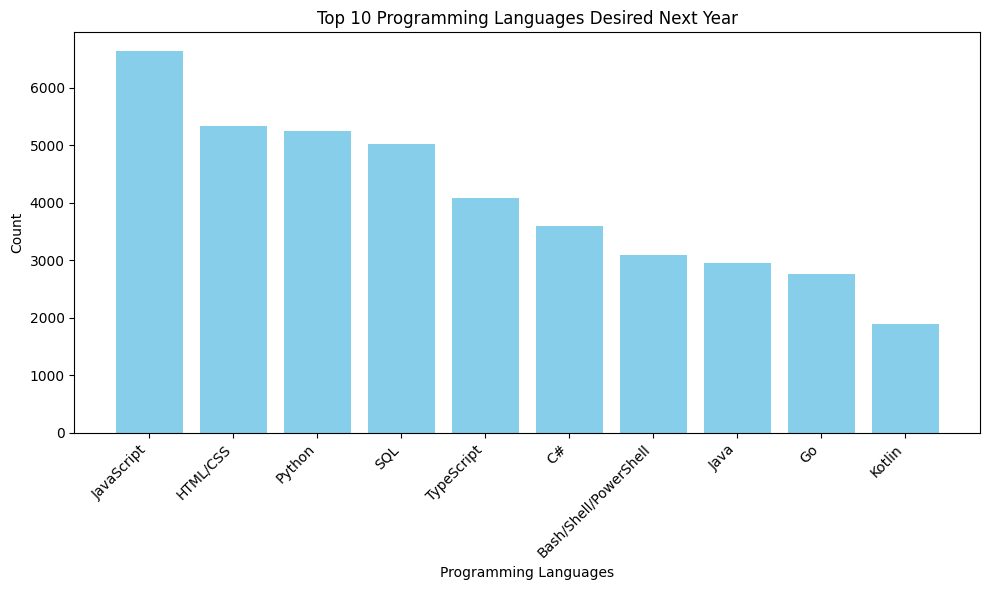

Most popular languages respondents wish to learn next year:
  LanguageDesireNextYear  Count
0             JavaScript   6630
1               HTML/CSS   5328
2                 Python   5239
3                    SQL   5012
4             TypeScript   4088
5                     C#   3591
6  Bash/Shell/PowerShell   3097
7                   Java   2953
8                     Go   2759
9                 Kotlin   1890

Rank of Python: 3


In [16]:
# Read data from the database into a DataFrame for the top 10 languages
query = """
    SELECT LanguageDesireNextYear, COUNT(*) AS Count
    FROM LanguageDesireNextYear
    GROUP BY LanguageDesireNextYear
    ORDER BY Count DESC LIMIT 10
"""
df = pd.read_sql_query(query, conn)

# Find the rank of Python
python_rank = df[df['LanguageDesireNextYear'] == 'Python'].index[0] + 1

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['LanguageDesireNextYear'], df['Count'], color='skyblue')
plt.title('Top 10 Programming Languages Desired Next Year')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Print the list and the rank of Python
print("Most popular languages respondents wish to learn next year:")
print(df)
print("\nRank of Python:", python_rank)

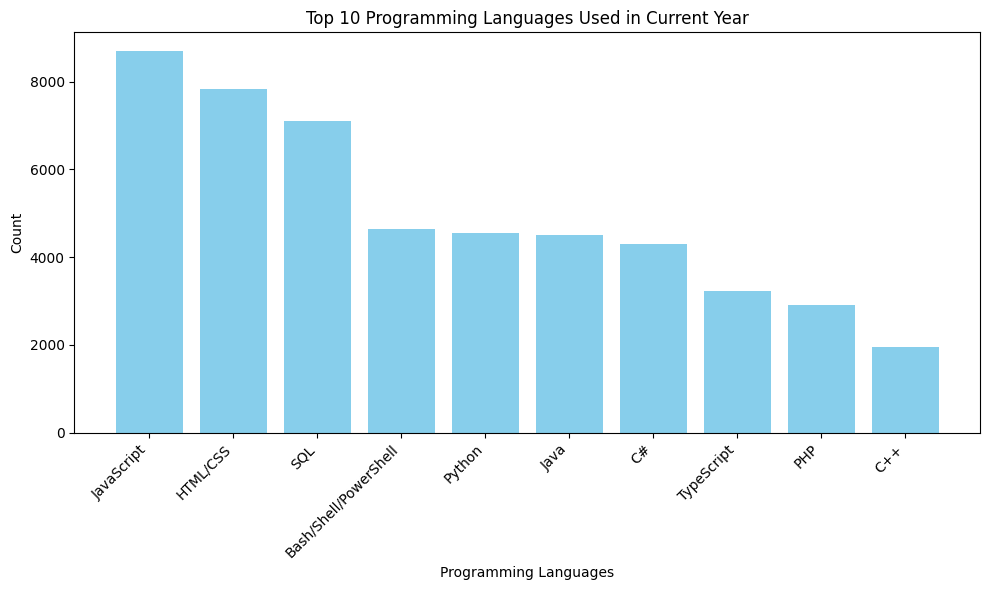

Most popular languages respondents are using in the current year:
      LanguageWorkedWith  Count
0             JavaScript   8687
1               HTML/CSS   7830
2                    SQL   7106
3  Bash/Shell/PowerShell   4642
4                 Python   4542
5                   Java   4506
6                     C#   4288
7             TypeScript   3232
8                    PHP   2913
9                    C++   1946

Rank of Python: 5


In [17]:
# Read data from the database into a DataFrame for the top 10 languages
query = """
    SELECT LanguageWorkedWith, COUNT(*) AS Count
    FROM LanguageWorkedWith
    GROUP BY LanguageWorkedWith
    ORDER BY Count DESC LIMIT 10
"""
df = pd.read_sql_query(query, conn)

# Find the rank of Python
python_rank = df[df['LanguageWorkedWith'] == 'Python'].index[0] + 1

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['LanguageWorkedWith'], df['Count'], color='skyblue')
plt.title('Top 10 Programming Languages Used in Current Year')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Print the list and the rank of Python
print("Most popular languages respondents are using in the current year:")
print(df)
print("\nRank of Python:", python_rank)

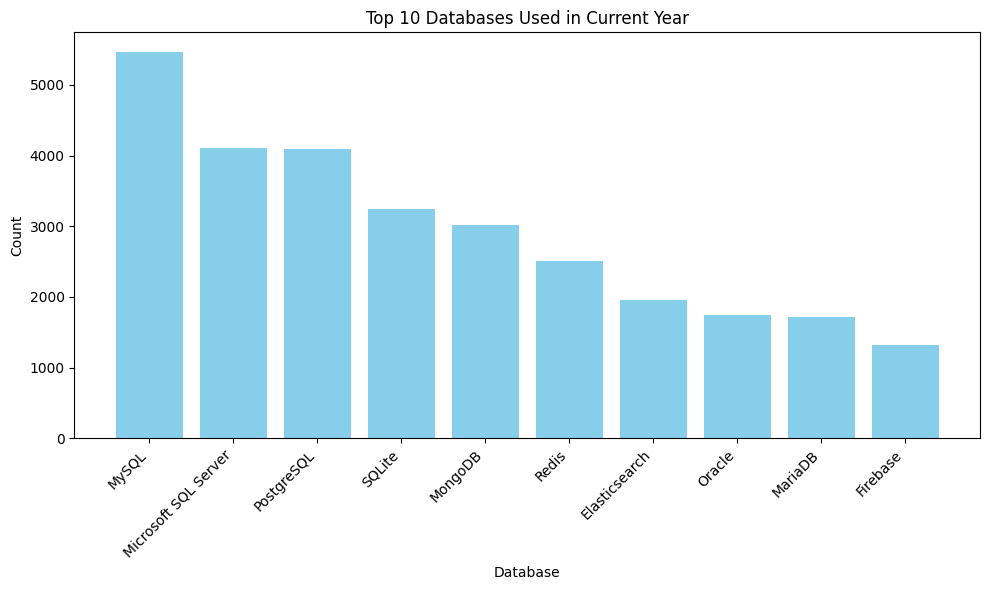

Most popular Databases in the current year:
     DatabaseWorkedWith  Count
0                 MySQL   5469
1  Microsoft SQL Server   4110
2            PostgreSQL   4097
3                SQLite   3248
4               MongoDB   3016
5                 Redis   2508
6         Elasticsearch   1954
7                Oracle   1744
8               MariaDB   1709
9              Firebase   1314


In [18]:
# Query the data for the top 10 databases used in the current year
query = """
    SELECT DatabaseWorkedWith, COUNT(*) AS Count
    FROM DatabaseWorkedWith
    GROUP BY DatabaseWorkedWith
    ORDER BY Count DESC
    LIMIT 10
"""
df = pd.read_sql_query(query, conn)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['DatabaseWorkedWith'], df['Count'], color='skyblue')
plt.title('Top 10 Databases Used in Current Year')
plt.xlabel('Database')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Print the list and the rank of Python
print("Most popular Databases in the current year:")
print(df)

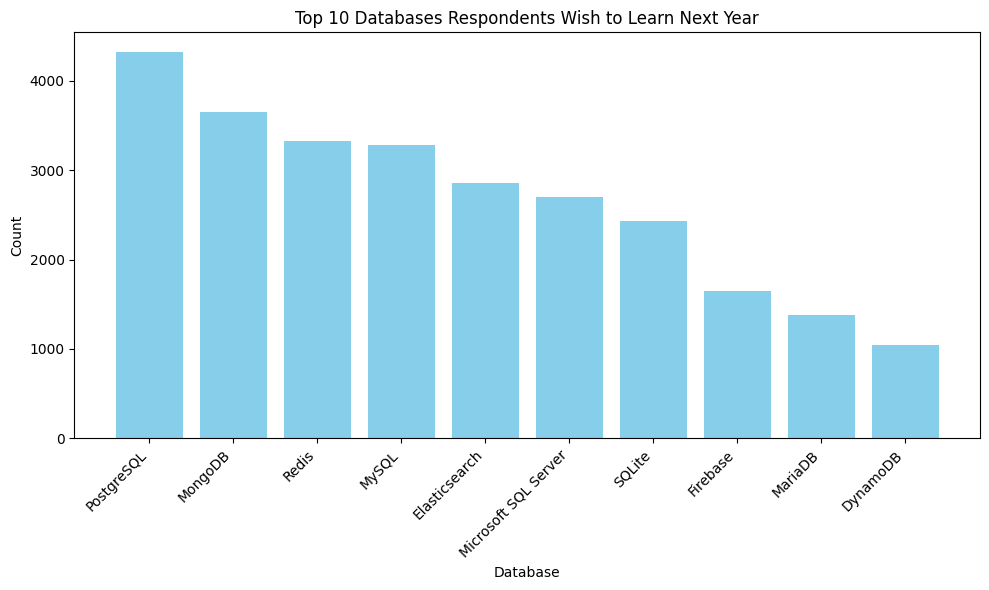

Most popular Databases in the Next year:
  DatabaseDesireNextYear  Count
0             PostgreSQL   4328
1                MongoDB   3649
2                  Redis   3331
3                  MySQL   3281
4          Elasticsearch   2856
5   Microsoft SQL Server   2706
6                 SQLite   2437
7               Firebase   1650
8                MariaDB   1385
9               DynamoDB   1044


In [19]:
# Query the data for the top 10 databases desired in the next year
query = """
    SELECT DatabaseDesireNextYear, COUNT(*) AS Count
    FROM DatabaseDesireNextYear
    GROUP BY DatabaseDesireNextYear
    ORDER BY Count DESC
    LIMIT 10
"""
df = pd.read_sql_query(query, conn)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['DatabaseDesireNextYear'], df['Count'], color='skyblue')
plt.title('Top 10 Databases Respondents Wish to Learn Next Year')
plt.xlabel('Database')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Print the list and the rank of Database
print("Most popular Databases in the Next year:")
print(df)

Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


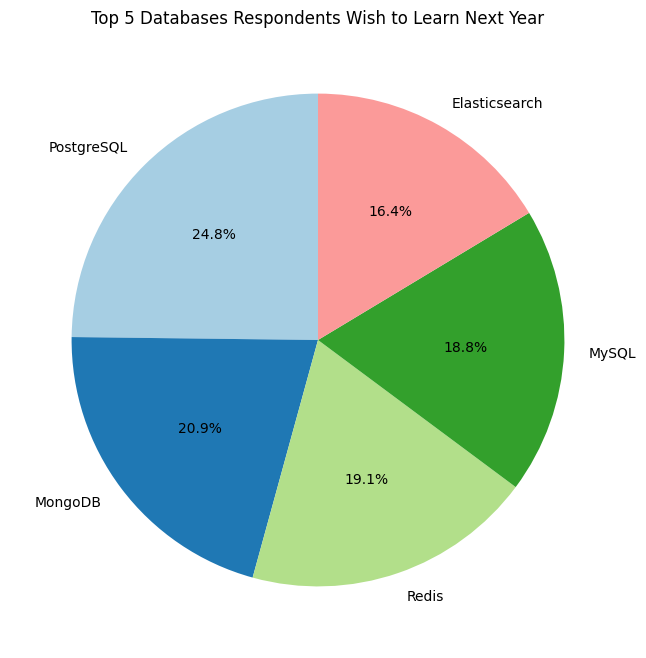

In [20]:
# your code goes here
# Read data from the database into a DataFrame
query = "SELECT DatabaseDesireNextYear, COUNT(*) AS Count FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY Count DESC LIMIT 5"
df = pd.read_sql_query(query, conn)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()



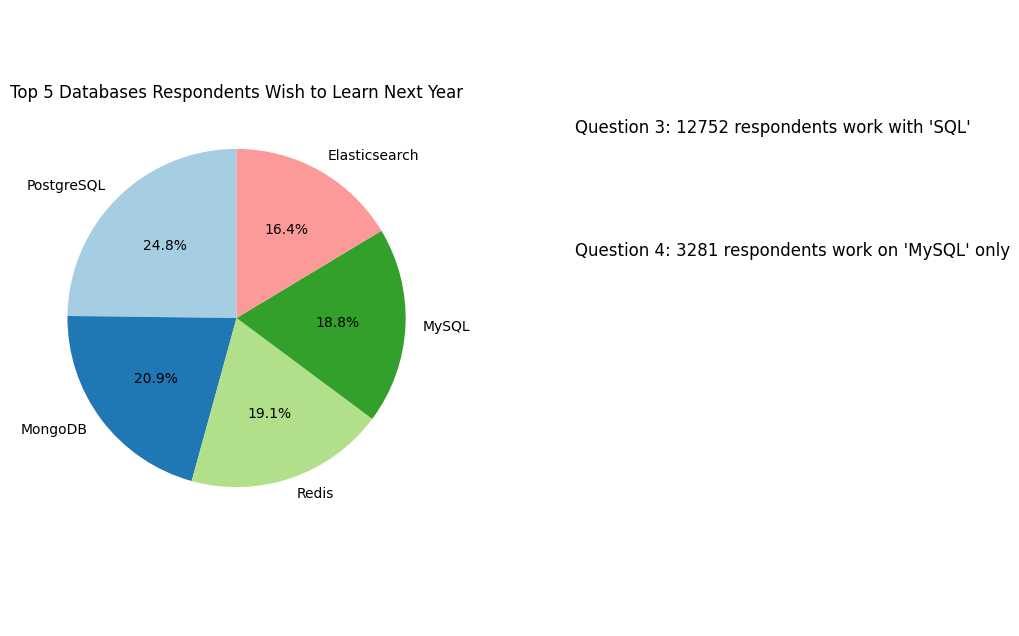

In [21]:
# Question 3: How many respondents indicated that they currently work with 'SQL'?
query_sql = "SELECT COUNT(*) AS NumRespondentsWithSQL FROM DatabaseDesireNextYear WHERE DatabaseDesireNextYear LIKE '%SQL%'"
df_sql = pd.read_sql_query(query_sql, conn)
num_respondents_with_sql = df_sql['NumRespondentsWithSQL'].iloc[0]

# Question 4: How many respondents indicated that they work on 'MySQL' only?
query_mysql = "SELECT COUNT(*) AS NumRespondentsWithMySQL FROM DatabaseDesireNextYear WHERE DatabaseDesireNextYear = 'MySQL'"
df_mysql = pd.read_sql_query(query_mysql, conn)
num_respondents_with_mysql = df_mysql['NumRespondentsWithMySQL'].iloc[0]

# Read data from the database into a DataFrame for the original pie chart
query_original = "SELECT DatabaseDesireNextYear, COUNT(*) AS Count FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY Count DESC LIMIT 5"
df_original = pd.read_sql_query(query_original, conn)

# Plot a pie chart with the original number of respondents as a list
plt.figure(figsize=(12, 8))

# Subplot 1: Original Pie Chart
plt.subplot(1, 2, 1)
plt.pie(df_original['Count'], labels=df_original['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')

# Subplot 2: Additional Information
plt.subplot(1, 2, 2)
plt.text(0.1, 0.8, f"Question 3: {num_respondents_with_sql} respondents work with 'SQL'", fontsize=12)
plt.text(0.1, 0.6, f"Question 4: {num_respondents_with_mysql} respondents work on 'MySQL' only", fontsize=12)
plt.axis('off')  # Turn off axis for the additional information subplot

plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Figure size 1000x600 with 0 Axes>

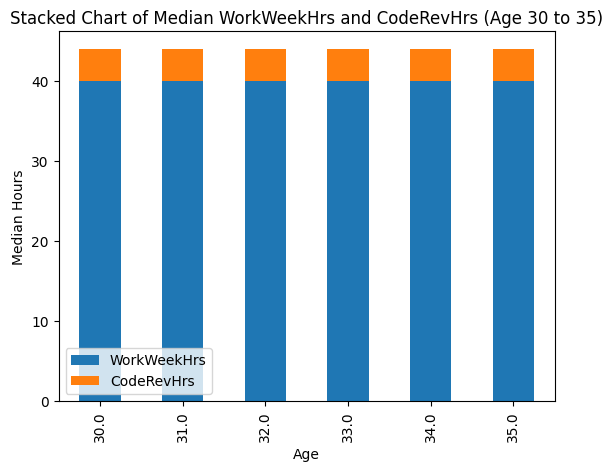

In [22]:
# your code goes here
# Read data from the database into a DataFrame
query = """
    SELECT Age, WorkWeekHrs, CodeRevHrs
    FROM master
    WHERE Age >= 30 AND Age <= 35
"""
df = pd.read_sql_query(query, conn)

# Check for missing values and drop rows with missing values
df = df.dropna(subset=['Age', 'WorkWeekHrs', 'CodeRevHrs'])

# Group by age and calculate median values
median_values = df.groupby('Age').median()

# Plot the stacked chart
plt.figure(figsize=(10, 6))
median_values[['WorkWeekHrs', 'CodeRevHrs']].plot(kind='bar', stacked=True)
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs (Age 30 to 35)')
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


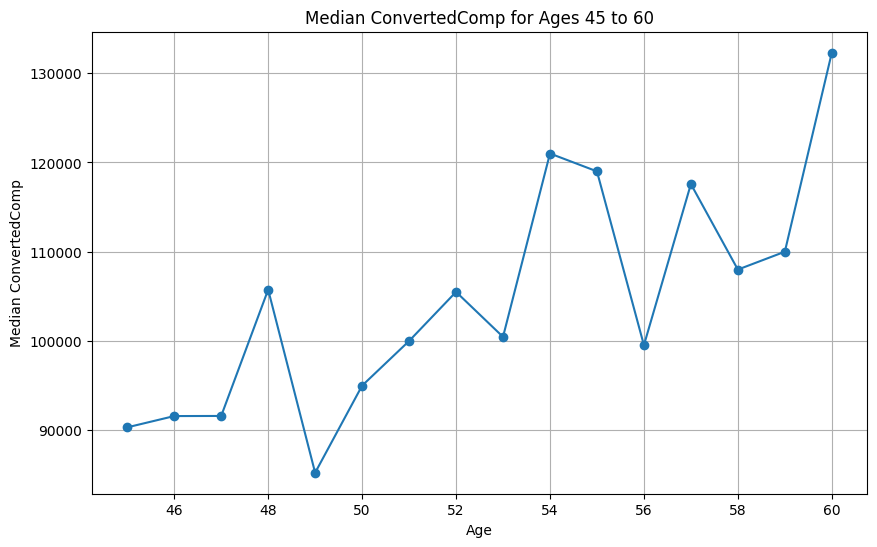

In [23]:
# your code goes here
# Read data from the database into a DataFrame
query = """
    SELECT Age, ConvertedComp
    FROM master
    WHERE Age >= 45 AND Age <= 60
"""
df = pd.read_sql_query(query, conn)

# Check for missing values and drop rows with missing values
df = df.dropna(subset=['Age', 'ConvertedComp'])

# Group by age and calculate median values
median_values = df.groupby('Age').median()

# Plot the median ConvertedComp for ages 45 to 60
plt.figure(figsize=(10, 6))
plt.plot(median_values.index, median_values['ConvertedComp'], marker='o')
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.grid(True)
plt.show()


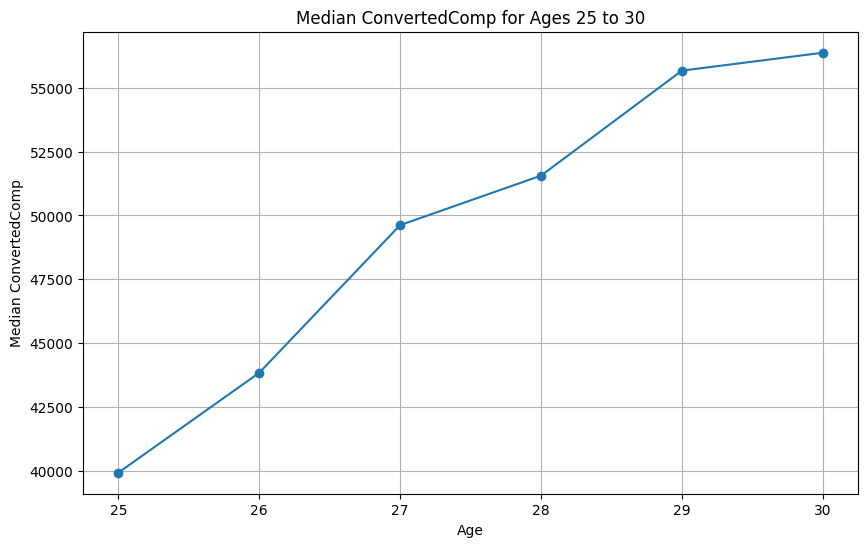

In [24]:
# your code goes here
# Read data from the database into a DataFrame
query = """
    SELECT Age, ConvertedComp
    FROM master
    WHERE Age >= 25 AND Age <= 30
"""
df = pd.read_sql_query(query, conn)

# Check for missing values and drop rows with missing values
df = df.dropna(subset=['Age', 'ConvertedComp'])

# Group by age and calculate median values
median_values = df.groupby('Age').median()

# Plot the median ConvertedComp for ages 45 to 60
plt.figure(figsize=(10, 6))
plt.plot(median_values.index, median_values['ConvertedComp'], marker='o')
plt.title('Median ConvertedComp for Ages 25 to 30')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.grid(True)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


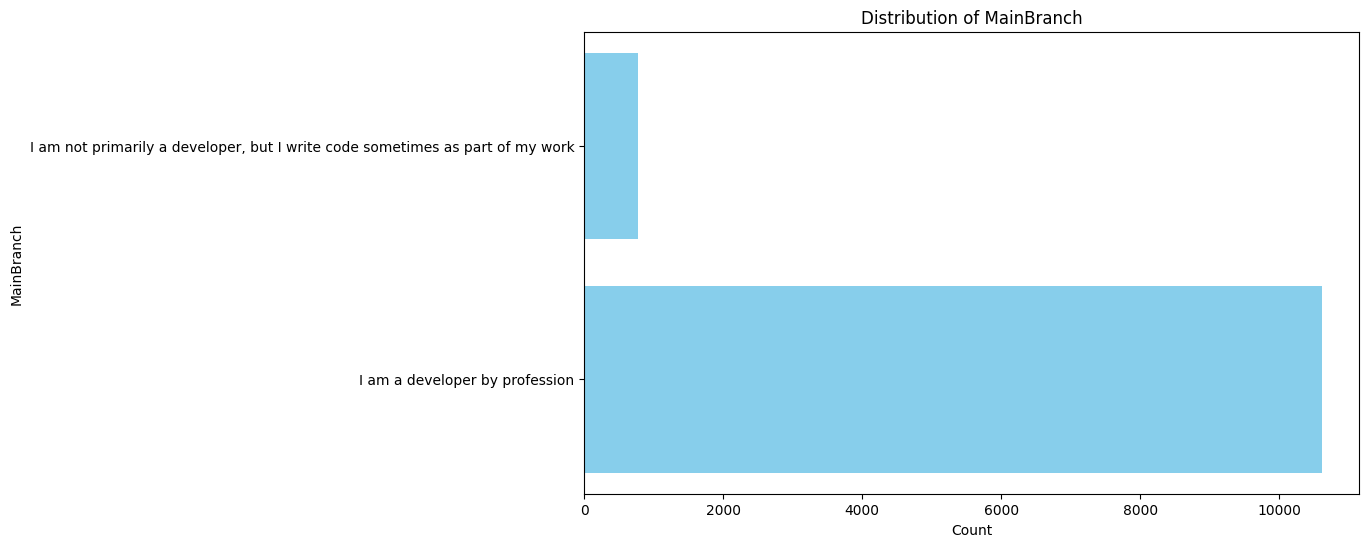

In [25]:
# your code goes here
# Read data from the database into a DataFrame
query = "SELECT MainBranch, COUNT(*) AS Count FROM master GROUP BY MainBranch"
df = pd.read_sql_query(query, conn)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['MainBranch'], df['Count'], color='skyblue')
plt.title('Distribution of MainBranch')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.show()


Close the database connection.


In [26]:
conn.close()